# Simulating motion of point charge under the Lorentz force

#### Ver 1:
- Use the ODE solver from last year to simulate the motion of a point charge under the Lorentz force
- Visual output has been modified to 3D
- Create 3D animation of 3D motion

---

We first import `numpy` to work with vectors in Python conveniently and `matplotlib.pyplot` to be able to plot our results. 

In [ ]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt

# Matplotlib toolkit for 3D plots 
from mpl_toolkits.mplot3d import Axes3D

# Method for animating plots
from matplotlib.animation import FuncAnimation

# For jupyter notebooks: to display animations inline
from IPython.display import HTML

# This is a magic command for plots being plotted inline in the notebook.
# Use 'qt' for more interactive 3D plots in a separate window (might not work on colab and other online platforms)
%matplotlib inline

### Input

This is the part of our code were we set the _input parameters_ for our simulation.
- we need the initial position $r_0$, initial velocity $v_0$, mass $m$  and charge $q$ of the point particle
- we need to define the vector fields of electric field strength $E$ and magnetic flux density $B$
- we need to set the time step $\Delta t$

In [ ]:
# Input

# initial position and velocity of the point particle
pos_init = np.array([.0, .0, .0])
vel_init = np.array([20.0, 0.0, 10.0 ])

# Mass of point particle (in kg)
m = 1

# Charge of the point particle (in C)
q = 1

# Electric field strength (in N/C)
def E(pos: np.array, t: float)-> np.array:
    return np.array([1.0, 1.0, .0])

# Magnetic flux density (in N/(Am))
def B(pos: np.array, t: float)-> np.array:
    return np.array([.0, .0, .5])


Now we determine the time step $\Delta t$. For that we take the number of time steps $N$ as well as the final time $t_{final}$ as the input and calculate
$$
    \Delta t = \frac{t_{final}}{N}
$$

In [3]:
# Set the number N of time steps 
N = 100000
# Set a final time 
t_final = 40

# Create time object. We want N number of time steps not counting t = 0
time, dt = np.linspace(0, t_final, N+1, retstep = True)

### Main

The main part of our code is the implementation of the _**Euler method**_. 
- In our fist implementation we simply run through a `for` loop for $N$ number of time steps. 
- In each run we update the postion vector implemented by `pos` and velocity vector implemented as `vel` via the *Euler method*:
$$
    \begin{align*}
        r(t+\Delta t) &\approx r(t) + v(t)\Delta t \\
        v(t+\Delta t) &\approx v(t) + \frac{q}{m}\bigl(E(r(t),t) + v(t)\times B(r(t),t)\bigr)\Delta t
    \end{align*}
$$

- We update the `pos` and `vel` vectors directly for each time step
- For each time step we save the newly calculated position vector `pos` in a list `trajectory`. This list is the data structure representing the calculated _trajectory_, i.e. the path of the point particle, hence the name.

In [4]:
# Implementing the Euler method

# Calculates the acceleration
def accel(pos: np.array, vel: np.array, t:float)-> np.array:
    return (q/m)*(E(pos,t) + np.cross(vel, B(pos,t)))

# Set the intial values for position and velocity
pos = pos_init
vel = vel_init

# array for saving the position for each time step for plotting and evaluation
# We think of it as a list with N+1 3D vectors
trajectory = np.empty((N+1, 3))
trajectory[0] = pos

# Calculate the new position and velocity for each time step and save them in the respective arrays
# We have to start with time step 1
for i, t in enumerate(time[1:], 1):
    # Calculation of the trajectory with friction
    pos = pos + vel*dt
    vel = vel + accel(pos, vel, t)*dt
    trajectory[i] = pos


The vectors `pos` and `vel` contain now the approximations to $r(t_{final})$ and $v(t_{final})$ we have calculated with the _Euler method_. The list `trajectory` contains all the numerically calculated points for each time step ranging from $t=0$ until $t=t_{final}$ and is the approximation of the real trajectory obtained by the _Euler method_.

### Output

We improve the output by plotting the trajectory of our projectile we have calculated with the help of the _Euler method_. We make use of the `matplotlib` package and start with a simple basic plot before we do an animation of the motion of the point charge.

Most of the code from the simulation of projectile motion can be kept. We have to plot in _3D_ instead of just _2D_. For this purpose we use `Axes3D` from `matplotlib`.


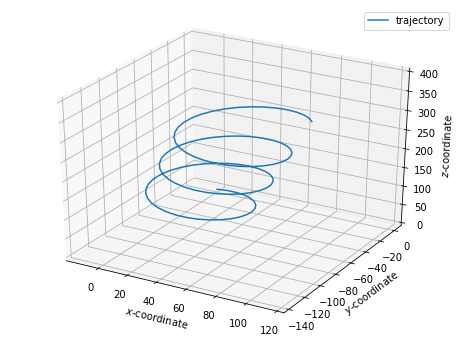

In [5]:
# Output: plot the trajectory of the point charge

fig3D = plt.figure(figsize = (8,6)) 
ax = fig3D.add_subplot(111, projection='3d')

ax.plot(trajectory[:N+1:(N+1)//100, 0], trajectory[:N+1:(N+1)//100, 1], trajectory[:N+1:(N+1)//100, 2], label = 'trajectory')

ax.legend()

ax.set_xlabel("$x$-coordinate")
ax.set_ylabel("$y$-coordinate")
ax.set_zlabel("$z$-coordinate")

plt.show()

##### Animation of the trajectory

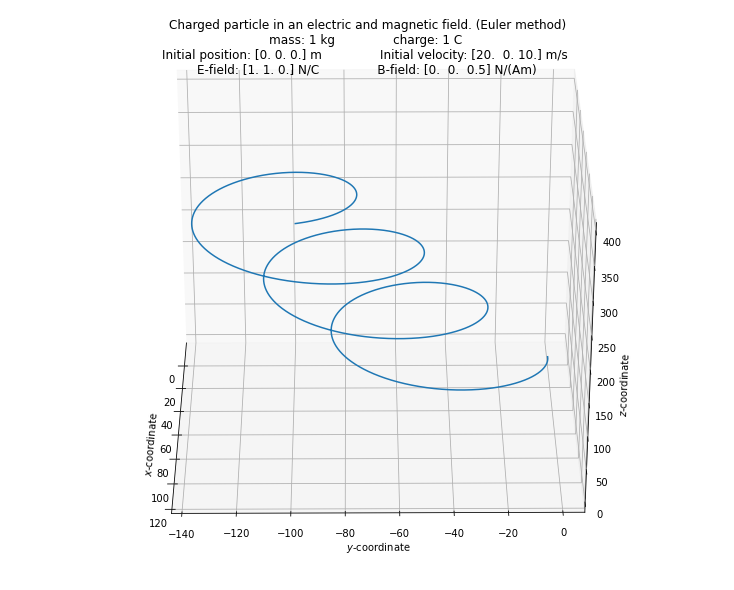

In [6]:
# Setting up the plotting figure
anim_fig = plt.figure(figsize=(10,8)) 
anim_ax = Axes3D(anim_fig)

anim_fig.suptitle('Charged particle in an electric and magnetic field. (Euler method)' + '\n'
                  + 'mass: ' + str(m)+ ' kg               charge: ' + str(q) + ' C \n'
                  + 'Initial position: '+ str(pos_init) + ' m               Initial velocity: '+ str(vel_init)+ ' m/s \n'
                  + 'E-field: ' + str(E(pos_init, 0)) + ' N/C               B-field: '+str(B(pos_init,0)) +' N/(Am)')

# frames per second
fps = 25

# Saving the line objects we will use for the plot. 
# Note that in 3D it is currently not possible to pass on empty lists as in 2D
line, = anim_ax.plot(trajectory[0:1,0], trajectory[0:1,1], trajectory[0:1,2])

# Setting range and labels of coordinate axes. 

anim_ax.set_xlim3d(trajectory[:,0].min()-5, trajectory[:,0].max()+5)
anim_ax.set_xlabel('$x$-coordinate')
anim_ax.set_ylim3d(trajectory[:,1].min()-5, trajectory[:,1].max()+5)
anim_ax.set_ylabel('$y$-coordinate')
anim_ax.set_zlim3d(trajectory[:,2].min()-5, trajectory[:,2].max()+5)
anim_ax.set_zlabel('$z$-coordinate')

# Caclulate step size for frames as we do not need to plot every frame
step = int(np.ceil(N/(t_final*fps)))

# Caclulate step size for rotation angle of the frame
dangle = 360/(t_final*fps)

# Called for each frame to plot the data until the index `frame`
def update(frame):
    
    # Rotate the view. This is not going to work when anim.ax is returned as the list of the animated objects
    # Note that this depends on the chosen backend renderer of matplotlib. It does not work with qt, for example
    # and hence does not work when run in IDEs like Spyder, for example
    anim_ax.view_init(30,dangle*frame)
    
    # There is no `set_data` in 3D. You have to pass on the 2D data and then specify 
    # the z-coordinate for matplotlib so it knows how to calculate the 3D projection 
    line.set_data(trajectory[:frame*step,0], trajectory[:frame*step,1])
    line.set_3d_properties(trajectory[:frame*step,2])
    return line,

# create the animation object using the figure `anim_fig` by calling the function update for each value in the list `frame`
# Use fps as frames per second, so the delay between each frame is 1000 ms / fps
ani = FuncAnimation(anim_fig, update, frames=range(np.around(t_final*fps)), interval = 1000//fps,
                     blit=True)

HTML(ani.to_html5_video())